In [1]:
import numpy as np
import pandas as pd
%config Completer.use_jedi = False

# Notebook 7: Validation by Geodesic Interpolation

In this notebook we test our ability to interpolate the distribution of cells at held-out time-points. 
Intuitively, the developmental process $\mathbb{P}_t$ traces out a *curve in the space of distributions*.
We sample cells at various time points and obtain noisy samples along this curve.
Optimal transport allows us to connect these noisy samples with straight lines (aka *geodesics*) in the space of distributions. This allows us to interpolate the distribution of cells at intermediate time-points. 
We can therefore test the performance of OT by holding out time-points and  comparing our interpolation estimate to the real held-out data.

We begin by initializing an OT Model for the serum time-course using pre-computed growth rates (stored in the file `serum_g.txt` created in Notebook 2). 

In [2]:
import sys
sys.path.insert(1,'/home/carlos.doebeli1/wot') 
import wot
wot.__file__

'/home/carlos.doebeli1/wot/wot/__init__.py'

In [123]:
VAR_GENE_DS_PATH = 'data/ExprMatrix.var.genes.h5ad'
LEARNED_GROWTH_SCORES_PATH = 'tmaps/serum_g.txt'
BATCH_PATH = 'data/batches.txt'
CELL_DAYS_PATH = 'data/cell_days.txt'
SERUM_CELL_IDS_PATH = 'data/serum_cell_ids.txt'
CELL_WEIGHTS_PATH = 'data/cell_weights.txt'

adata = wot.io.read_dataset(VAR_GENE_DS_PATH, obs=[CELL_DAYS_PATH, BATCH_PATH, CELL_WEIGHTS_PATH, LEARNED_GROWTH_SCORES_PATH], obs_filter=SERUM_CELL_IDS_PATH)

ot_model = wot.ot.OTModel(adata, growth_rate_field='g2',growth_iters = 1) 

In [8]:
DOWNSAMPLED_GENE_DS_PATH = 'data/downsampled_ExprMatrix.h5ad'
LEARNED_GROWTH_SCORES_PATH = 'tmaps/serum_g.txt'
BATCH_PATH = 'data/batches.txt'
SERUM_CELL_IDS_PATH = 'data/serum_cell_ids.txt'

adata = wot.io.read_dataset(DOWNSAMPLED_GENE_DS_PATH, obs=[BATCH_PATH, LEARNED_GROWTH_SCORES_PATH], obs_filter=SERUM_CELL_IDS_PATH)

ot_model = wot.ot.OTModel(adata, growth_rate_field='g2',growth_iters = 1) 

In [5]:
unique_days = adata.obs['day'].unique()
unique_days = unique_days[np.isnan(unique_days) == False]

# adata.obs['weight'] = pd.Series(adata.obs['n_reads'])

# for day in unique_days:
#     total = adata.obs.loc[adata.obs['day'] == day, 'weight'].sum()
#     adata.obs.loc[adata.obs['day'] == day, 'weight']/= total
#     print(total)




In [6]:
for day in unique_days:
    total = adata.obs.loc[adata.obs['day'] == day, 'weight'].sum()
#     adata.obs.loc[adata.obs['day'] == day, 'weight']/= total
    print(total)

1.0
1.0
0.99999994
1.0
1.0
0.9999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
0.5384468
0.5079358
0.62785417
0.3621353
0.49797213
0.46698868
0.47387016
0.40050614
0.56039345
0.5099443
0.6997333
0.6578884
0.5672189
0.43687046
0.38927686
0.5990188
0.57745725
0.41756546
0.57050925
0.5571277
0.52220106
0.38746625


In [125]:
ot_model = wot.ot.OTModel(adata, growth_rate_field='g2',growth_iters = 1) 

In [7]:
adata.obs

,day,n_reads,n_features,x,y,weight,covariate,g0,g1,g2,g3
D0_Dox_C1_AAACCTGAGTATCTCG-1,0.0,4737.0,1874,15222.6770,-4868.6310,0.000127,1,0.844714,0.857247,0.861897,0.860347
D0_Dox_C1_AAACCTGCAAGCGAGT-1,0.0,9078.0,2641,14372.5190,-5519.7607,0.000243,1,0.274122,0.355896,0.443380,0.532925
D0_Dox_C1_AAACCTGGTCTCTTAT-1,0.0,4149.0,1620,14736.7470,-5297.1333,0.000111,1,0.978787,1.041500,1.080390,1.097277
D0_Dox_C1_AAACCTGTCAACACTG-1,0.0,9012.0,2727,14339.9720,-5383.0703,0.000241,1,0.383064,0.334099,0.287979,0.246166
D0_Dox_C1_AAACCTGTCGTTGCCT-1,0.0,6602.0,2195,15267.7110,-5177.4090,0.000177,1,0.875599,1.022342,1.165611,1.302493
...,...,...,...,...,...,...,...,...,...,...,...
D18_serum_C2_TTTGGTTTCTTATCTG-1,18.0,9355.0,2128,2920.6948,3489.2040,0.000093,2,NaN,NaN,NaN,NaN
D18_serum_C2_TTTGTCAAGATTACCC-1,18.0,2440.0,1056,4099.2476,8137.7266,0.000024,2,NaN,NaN,NaN,NaN
D18_serum_C2_TTTGTCAAGTGAACAT-1,18.0,4467.0,1461,-3411.1282,3308.0276,0.000044,2,NaN,NaN,NaN,NaN
D18_serum_C2_TTTGTCAGTATAAACG-1,18.0,6008.0,1756,-3523.6267,3587.4827,0.000060,2,NaN,NaN,NaN,NaN


We are now ready to test interpolation over a single interval from day $17$ to $18$. 
We set aside the data from day $17.5$, and we estimate the coupling from $17$ to $18$ by computing a transport map. 
We then compute an interpolating point cloud of simulated day $17.5$ cells and compare this to the real observations using earth mover's distance. 
We also compute the distance betwen batches of real observations at time $17.5$. 
This provides an estimate of the baseline noise level. 
Finally, we also compute distances between the real point cloud at $17.5$ and several null-estimates different from OT. These include
* an interoplation using a random coupling
* the first point in the interval (day 17.0 cells)
* the last point in the interval (day 18.0 cells)

The function `compute_validation_summary` returns a table containing all these point-cloud distances.

In [132]:
# interp_summary = wot.ot.compute_validation_summary(ot_model, day_triplets=[(17, 17.5, 18)])

In [11]:
print(interp_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std]))

                        mean           std
interval_mid name                         
17.5         F     14.707946  1.884394e+00
             I     13.066070  1.482439e+00
             L     14.842774  2.340224e+00
             P     14.143939  1.256074e-14
             R     17.127941  1.439596e-01
             Rg    17.102199  1.309015e-01


In [7]:
print(interp_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std]))

                        mean           std
interval_mid name                         
17.5         F     11.573237  1.390878e+00
             I     10.954625  8.493043e-01
             L     13.521019  1.342701e+00
             P     11.041064  1.776357e-15
             R     13.696161  1.451251e-01
             Rg    13.703342  1.417177e-01


In [119]:
print(interp_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std]))

                        mean           std
interval_mid name                         
17.5         F     11.573237  1.390878e+00
             I     11.359268  1.157869e+00
             L     13.521019  1.342701e+00
             P     11.041064  1.776357e-15
             R     13.702449  1.623107e-01
             Rg    13.694210  1.557320e-01


This produces a table `interp_summary` which contains all the distances between point clouds described above. 

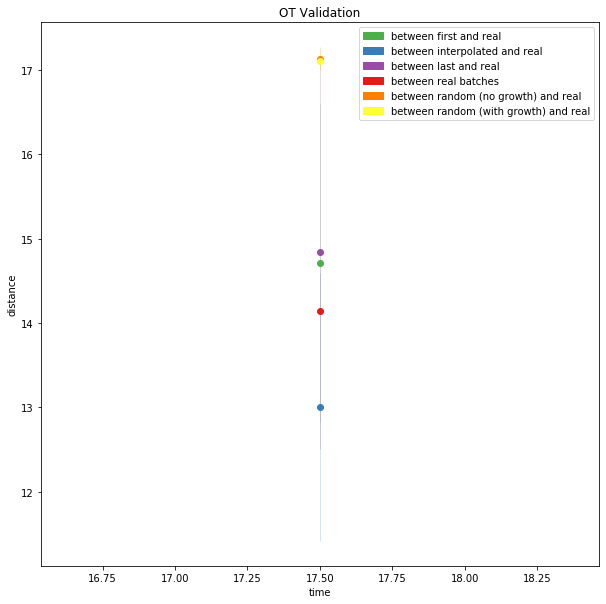

In [4]:
wot.graphics.plot_ot_validation_summary_stats(interp_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std]))

We now use the `compute_validation_summary` function to check the quality of interpolation at *each* triplet of consecutive time-points $(t_i,t_{i+1},t_{i+2})$. For each triple, we
* hold out the data from time $t_{i+1}$,
* estimate the coupling $\gamma_{t_i,t_{i+2}}$ connecting time $t_{i}$ to $t_{i+2}$,
* compute an interpolating distribution at time $t_{i+1}$,
* and compare this to the held-out data $\hat{\mathbb{P}}_{t_{i+1}}$.

If the held-out data consists of multiple batches (e.g. $\hat{\mathbb{P}}_{t_{i+1}}^{(1)}$ and $\hat{\mathbb{P}}_{t_{i+1}}^{(2)}$), then we compare those to each other to estimate the baseline noise level.

We also compare several null models to the held-out data.

Compute validation for all triplets in dataset. As this can take several hours. We provide precomputed results for convenience.

In [12]:
# all_triplets_summary = wot.ot.compute_validation_summary(ot_model)

# # save results
# all_triplets_summary.to_csv('data/downsampled_serum_validation_summary_weighted.txt')
# all_triplets_stats = all_triplets_summary.groupby(['interval_mid', 'name'])['distance'].agg([np.mean, np.std])
# all_triplets_stats.to_csv('data/downsampled_serum_validation_summary_stats_weighted.txt')

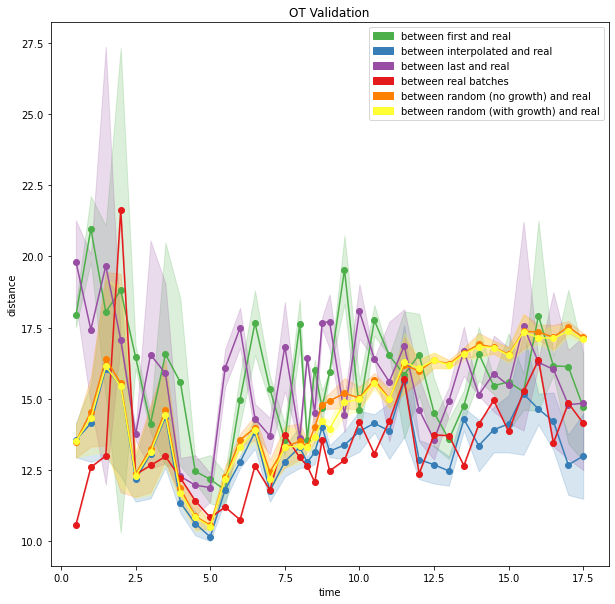

In [127]:
# read in and plot results
all_triplets_stats = pd.read_csv('data/serum_validation_summary_stats.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats)

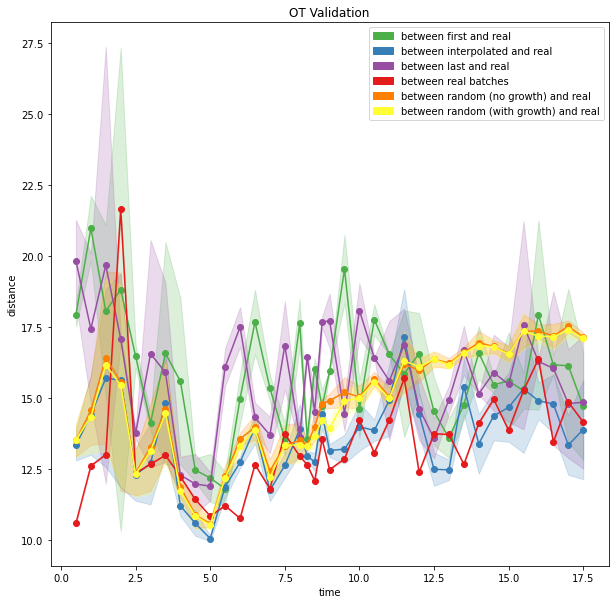

In [128]:
# read in and plot results
all_triplets_stats = pd.read_csv('data/serum_validation_summary_stats_weighted.txt')
wot.graphics.plot_ot_validation_summary_stats(all_triplets_stats)

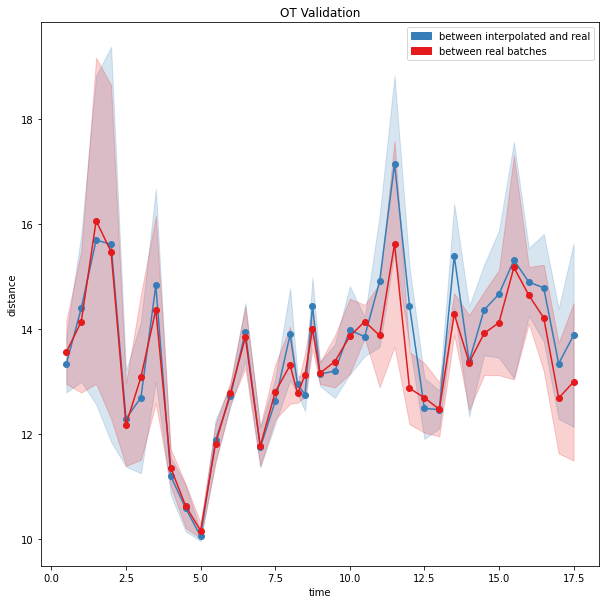

In [130]:
stats_weighted = pd.read_csv('data/serum_validation_summary_stats_weighted.txt')
stats = pd.read_csv('data/serum_validation_summary_stats.txt')

stats = stats[stats['name']=='I']
stats_weighted = stats_weighted[stats_weighted['name']=='I']

stats = stats.replace('I','P')
bigdata = stats.append(stats_weighted, ignore_index=True)

wot.graphics.plot_ot_validation_summary_stats(bigdata)

Average distance: -0.2326


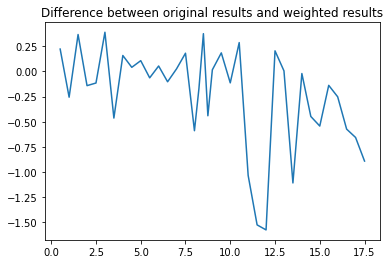

In [131]:
import matplotlib.pyplot as plt

x = bigdata[0:37]['interval_mid']
y = np.subtract(bigdata[0:37]['mean'].to_numpy(), bigdata[37:]['mean'].to_numpy())

plt.plot(x,y)
plt.title("Difference between original results and weighted results")


print('Average distance: {:.4f}'.format(np.mean(y),'2f'))
# plt.plot(bigdata[0:37]['interval_mid'],bigdata[0:37]['mean'])
# plt.plot(bigdata[37:]['interval_mid'],bigdata[37:]['mean'])

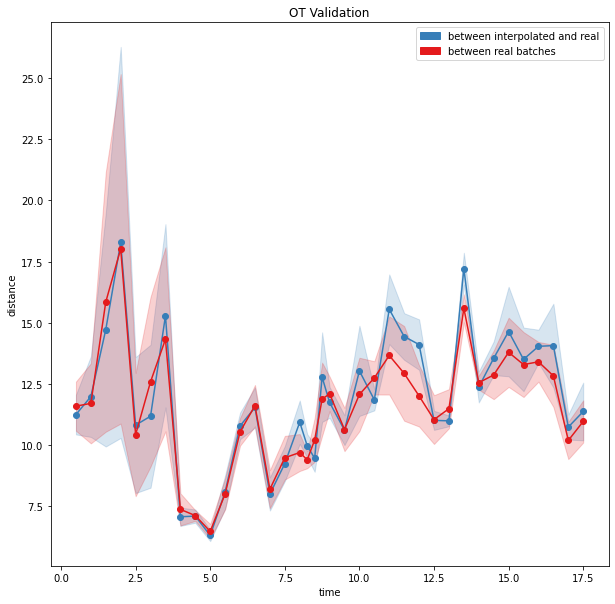

In [13]:
stats_weighted = pd.read_csv('data/downsampled_serum_validation_summary_stats_weighted.txt')
stats = pd.read_csv('data/downsampled_serum_validation_summary_stats.txt')

stats = stats[stats['name']=='I']
stats_weighted = stats_weighted[stats_weighted['name']=='I']

stats = stats.replace('I','P')
bigdata = stats.append(stats_weighted, ignore_index=True)

wot.graphics.plot_ot_validation_summary_stats(bigdata)

Average distance: -0.2959


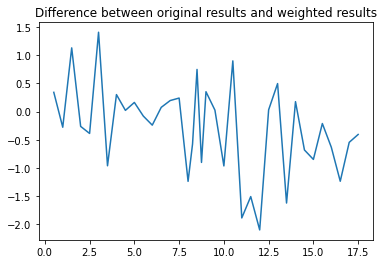

In [14]:
import matplotlib.pyplot as plt

x = bigdata[0:37]['interval_mid']
y = np.subtract(bigdata[0:37]['mean'].to_numpy(), bigdata[37:]['mean'].to_numpy())

plt.plot(x,y)
plt.title("Difference between original results and weighted results")


print('Average distance: {:.4f}'.format(np.mean(y),'2f'))
# plt.plot(bigdata[0:37]['interval_mid'],bigdata[0:37]['mean'])
# plt.plot(bigdata[37:]['interval_mid'],bigdata[37:]['mean'])

In [15]:
bigdata[0:37]['mean']

0     11.594539
1     11.709630
2     15.851960
3     18.022750
4     10.434632
5     12.592538
6     14.326851
7      7.379404
8      7.125803
9      6.477468
10     8.012269
11    10.548031
12    11.616579
13     8.204319
14     9.489421
15     9.701210
16     9.405283
17    10.213750
18    11.879869
19    12.103337
20    10.639708
21    12.073443
22    12.751332
23    13.665601
24    12.932716
25    12.011723
26    11.046333
27    11.492906
28    15.592298
29    12.554238
30    12.871352
31    13.795327
32    13.294474
33    13.407577
34    12.833866
35    10.194334
36    10.971852
Name: mean, dtype: float64

In [16]:
bigdata[37:]['mean']

37    11.626369
38    11.707356
39    15.878281
40    18.024740
41    10.435323
42    12.607398
43    14.379150
44     7.365834
45     7.124227
46     6.477474
47     8.010455
48    10.545941
49    11.622112
50     8.201772
51     9.474867
52     9.674935
53     9.414109
54    10.217676
55    11.867406
56    12.084275
57    10.639689
58    12.067970
59    12.743708
60    13.682111
61    12.984631
62    12.035447
63    11.056593
64    11.463028
65    15.581458
66    12.531992
67    12.869654
68    13.816973
69    13.275245
70    13.454667
71    12.861037
72    10.210549
73    10.997861
Name: mean, dtype: float64

In [8]:
import anndata
from anndata import AnnData

In [18]:
bdata = adata.copy()

In [42]:
cdata = bdata[bdata.obs['day']==0]
ddata = bdata[bdata.obs['day']==1]

edata = anndata.concat([cdata[0:2],ddata[0:2]])
edata.obs

,day,n_reads,n_features,x,y,weight,covariate,g0,g1,g2,g3
D0_Dox_C1_AAACCTGAGTATCTCG-1,0.0,4737.0,1874,15222.677,-4868.6310,0.000127,1,0.844714,0.857247,0.861897,0.860347
D0_Dox_C1_AAACCTGCAAGCGAGT-1,0.0,9078.0,2641,14372.519,-5519.7607,0.000243,1,0.274122,0.355896,0.443380,0.532925
D1_Dox_C1_AAACCTGGTGACCAAG-1,1.0,15318.0,3693,9749.852,-7767.5234,0.000710,1,3.085481,2.658674,2.223500,1.829898
D1_Dox_C1_AAACCTGTCCGTAGTA-1,1.0,4041.0,1809,9795.660,-7710.3520,0.000187,1,1.143223,0.918085,0.714498,0.546320


In [120]:
X = np.asarray([[0],[1],[0],[3]])
# X = np.random.normal(size=(4,4))
indices = ['D0_AAAA', 'D0_AAAC', 'D1_AAAT', 'D1_AAAG']
day = [0,0,1,1]
n_reads = [0,1,0,3]
n_features = [0,1,0,1]
x = [0,1,0,3]
y = [0,0,0,0]
covariate = [1,1,1,1]
g0 = g1 = g2 = g3 = [1,1,1,1]
columns = ['day', 'n_reads', 'n_features', 'x', 'y', 'weight', 'covariate', 'g0', 'g1', 'g2', 'g3']

weight = [0.5, 0.5, 0.5, 0.5]
weight = [0.501, 0.499, 0.501, 0.499]
weight = [0.5, 0.5, 0.8, 0.2]
# weight = [1/3, 2/3, 2/3, 1/3]
# weight = [0,1,1,0]


df = pd.DataFrame(list(zip(day, n_reads, n_features, x, y, weight, covariate, g0, g1, g2, g3)), index=indices, 
                      columns=columns)

cdata = anndata.AnnData(X, obs=df)

In [95]:
import importlib
importlib.reload(wot)
importlib.reload(wot.ot)
importlib.reload(wot.ot.ot_model)
importlib.reload(wot.ot.optimal_transport)

<module 'wot.ot.optimal_transport' from '/home/carlos.doebeli1/wot/wot/ot/optimal_transport.py'>

In [116]:
cdata.obs

,day,n_reads,n_features,x,y,weight,covariate,g0,g1,g2,g3
D0_AAAA,0,0,0,0,0,0.5,1,1,1,1,1
D0_AAAC,0,1,1,1,0,0.5,1,1,1,1,1
D1_AAAT,1,0,0,0,0,0.8,1,1,1,1,1
D1_AAAG,1,3,1,3,0,0.2,1,1,1,1,1


In [121]:
ot_model = wot.ot.OTModel(cdata, growth_rate_field='g2',growth_iters = 1) 

local_pca set to 30, above gene count of 1. Disabling PCA


In [135]:
# res = ot_model.compute_transport_map(0,1)

In [133]:
# res = ot_model.compute_transport_map(0,1)

In [134]:
# res = ot_model.compute_transport_map(0,1)

In [53]:
res.X.tolist()

[[0.998721718788147, 2.2565578100313976e-18],
 [0.0006108726956881583, 0.9684715270996094]]

In [115]:
res.X.tolist()

[[1.1633236408233643, 1.4983004557076246e-21],
 [0.43049395084381104, 0.38904473185539246]]

In [103]:
res.X@np.ones(res.X.shape[1])

array([0.62492273, 1.37375197])

In [104]:
res.X.T@np.ones(res.X.shape[0])

array([0.99984208, 0.99883262])

In [191]:
res.X.tolist()

[[1.2492376565933228, 7.019873231514945e-18],
 [0.7498765587806702, 1.9987232685089111]]

In [10]:
interp_summary

,interval_start,interval_mid,interval_end,t0,t1,cv0,cv1,name,distance,full
0,17,17.5,18,17.5,17.5,2,1,P,14.143939,False
1,17,17.5,18,17.5,17.5,"(1, 1)",1,Rg,16.943226,False
2,17,17.5,18,17.5,17.5,"(1, 1)",1,I,11.644798,False
3,17,17.5,18,17.5,17.5,"(1, 1)",1,R,17.039193,False
4,17,17.5,18,17.0,17.5,1,1,F,13.375479,False
5,17,17.5,18,18.0,17.5,1,1,L,13.187986,False
6,17,17.5,18,17.5,17.5,"(1, 2)",1,Rg,17.042143,False
7,17,17.5,18,17.5,17.5,"(1, 2)",1,I,12.431452,False
8,17,17.5,18,17.5,17.5,"(1, 2)",1,R,16.994584,False
9,17,17.5,18,17.5,17.5,"(2, 1)",1,Rg,16.997191,False


In [48]:
import ot

weights_a = [0.5, 0.5]
weights_b = [0.5, 0.5]
cost_matrix = [[0, 3.6], [0.4, 1.6]]
reg = 1
reg_m = 1

ot.unbalanced.sinkhorn_stabilized_unbalanced(weights_a, weights_b, cost_matrix, reg, reg_m)

array([[0.52273999, 0.03916685],
       [0.32837862, 0.27121552]])

In [81]:
X = np.asarray([[0],[1],[1],[0],[0],[3]])
# X np.random.normalormal(size=(6,4))
indices = ['D0_AAAA', 'D0_AAAC', 'D0_AACA', 'D1_AAAT', 'D1_AAAG', 'D1_AATA']
day = [0,0,0,1,1,1]
n_reads = [0,1,1,0,3,3]
n_features = [0,1,1,0,1,1]
x = [0,1,1,0,3,1]
y = [0,0,0,0,0,0]
covariate = [1,1,1,1,1,1]
g0 = g1 = g2 = g3 = [1,1,1,1,1,1]
columns = ['day', 'n_reads', 'n_features', 'x', 'y', 'weight', 'covariate', 'g0', 'g1', 'g2', 'g3']

weight = [1/3, 1/3, 1/3, 1/3, 1/3, 1/3]

# weight = [0.5, 0.5,0.5,0.5, 0.5, 0.5]
# weight = [0.501, 0.499, 0.501, 0.499]
# weight = [0.5, 0.5, 0.8, 0.2]


df = pd.DataFrame(list(zip(day, n_reads, n_features, x, y, weight, covariate, g0, g1, g2, g3)), index=indices, 
                      columns=columns)

cdata = anndata.AnnData(X, obs=df)

In [64]:
cdata.obs

,day,n_reads,n_features,x,y,weight,covariate,g0,g1,g2,g3
D0_AAAA,0,0,0,0,0,0.166667,1,1,1,1,1
D0_AAAC,0,1,1,1,0,0.166667,1,1,1,1,1
D0_AACA,0,1,1,1,0,0.166667,1,1,1,1,1
D1_AAAT,1,0,0,0,0,0.166667,1,1,1,1,1
D1_AAAG,1,3,1,3,0,0.166667,1,1,1,1,1
D1_AATA,1,3,1,1,0,0.166667,1,1,1,1,1


In [82]:
ot_model = wot.ot.OTModel(cdata, growth_rate_field='g2',growth_iters = 1) 

local_pca set to 30, above gene count of 1. Disabling PCA


In [136]:
# res = ot_model.compute_transport_map(0,1)

In [46]:
res.X

array([[9.8606926e-01, 6.8900081e-12, 6.8900081e-12],
       [6.5627499e-03, 4.9004120e-01, 4.9004120e-01],
       [6.5627499e-03, 4.9004120e-01, 4.9004120e-01]], dtype=float32)